16) Quais são os principais motivos de descarte? Qual valor total de descarte? Qual período com maior descarte? Qual sexo é mais descartado? 

In [199]:
import pandas as pd 
import matplotlib.pyplot as plt
import re as re

In [200]:
descarte = pd.read_csv('../tabelas_test/est_est_log_2019-06-18.csv', index_col='id')
descarte = descarte[(descarte['obs_desc'] != 'AAA') 
            & (descarte['obs_desc'] != '666')
            & (descarte['obs_desc'] != 'Test BioterC')
            & (descarte['obs_desc'] != 'Test')
            & (descarte['num_ani'] < 200)
            & (descarte['util'] == 'desc')
           ]

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Alterando formato da data

datas = ['date_hoje', 'date_nasc', 'data_inicio', 'date_acas', 'date_nasc_acas', 'date_sex']

for d in datas:
    descarte[d] = pd.to_datetime(descarte[d], unit = 's')
descarte.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
66,2014-08-26 17:58:05,Tania,Swiss B,3,f,2014-04-03 04:00:00,6,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,3,0,Descarte Zootecnico,I
73,2014-09-02 12:20:36,Tania,Swiss B,1,m,2014-06-10 04:00:00,55,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,1,0,p/ acasal.,I
95,2014-09-17 13:14:12,Tania,S129WT,2,m,2014-04-21 04:00:00,67,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,2,0,Tranferencia cx,AAA
96,2014-09-17 13:14:12,Tania,S129WT,4,m,2014-06-26 04:00:00,68,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,4,0,Tranferencia cx,AAA
97,2014-09-17 13:14:12,Tania,S129WT,2,m,2014-07-28 04:00:00,69,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,2,0,Tranferencia cx,AAA


In [201]:
len(descarte[descarte['obs_desc'] == 'Descarte Zootécnico'])

945

In [202]:
#não lembro desse código.
descarte['obs_desc'] = list(map(lambda x: str(x).strip(), descarte['obs_desc']))

In [203]:
len(descarte[descarte['obs_desc'] == 'Descarte Zootécnico'])

948

In [204]:
# desc_df = pd.DataFrame(descarte['obs_desc'])
# desc_df['num_ani'] = descarte['num_ani']
# #desc_df = descarte.set_index('obs_desc')
# desc_df.head()

# #.lower().capitalize()

In [205]:
descarte.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2287 entries, 66 to 18379
Data columns (total 28 columns):
date_hoje         2287 non-null datetime64[ns]
user              2284 non-null object
ling              2287 non-null object
num_ani           2287 non-null int64
m_f               2287 non-null object
date_nasc         2287 non-null datetime64[ns]
id_orig           2287 non-null object
util              2287 non-null object
id_solic          2287 non-null int64
data_inicio       2287 non-null datetime64[ns]
time              2287 non-null object
total_time        2287 non-null int64
doses             2287 non-null int64
data_solic        2287 non-null int64
data_forn         2287 non-null int64
data_fim          2287 non-null int64
num_m             2287 non-null int64
num_f             2287 non-null int64
date_acas         2287 non-null datetime64[ns]
date_nasc_acas    2287 non-null datetime64[ns]
num_nasc          2287 non-null int64
date_sex          2287 non-null datetime64

CONCATENAÇÕES DE MOTIVOS - 10% COM MAIS EVENTOS

In [206]:
erro = descarte['obs_desc'].replace(('erro de cadastro', 
                              'erro cadastro', 'error','erro de cadastro era 1 fêmea','erro  de cadastro',
                             'erro programa','Transferencia error','erro de contagem','erro de cadatro',
                             'erro de casa','erro sexagem','Erro Cadastro', 'Erro cadastro', 'Erro cadastro',
                              'Erro de Cadastro', 'Erro no cadastro','Animais fornecidos para Fabiano Figueiredo em 15/02/2018 - Erro no sistema (Exp. já encerrado).',
                              'Erro de registro','Erro de cadastro. Eram femeas', 'Erro de sexagem', 'Erro de cadastro, não estava na cx',
                             'Erro de lançamento no bioterc', 'teste de cadastro', 'ñ encontrado na cx',
                                    'nao estava na cx', 'Erro de cadastro', 'não estava na cx', 'não foi achado animal'), 'Erro de cadastro', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [207]:
zoo = descarte['obs_desc'].replace(('ZOO', 'fornecido Zoológico', 
                              'Fornecido zoológico', 
                              'Fornecido Zoológico', 
                              'Fornecidos Zoológico',
                             'fornecido zoológico',
                             'zoo', 'zoologico'),'Fornecido Zoológico', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [208]:
velhos = descarte['obs_desc'].replace(('velhos', 
                              'ANIMAIS VELHOS',
                             'Animais velhos',
                             'Animais Velhos',
                             'Animal velho'), 'Velhos', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [209]:
descart_zoo = descarte['obs_desc'].replace(('Descarte Zootecnico', 
                              'Caixa caiu no chão > Descarte Zootécnico',
                             'Animais com idade apropriada para descarte zootécnico',
                             'descarte'), 'Descarte Zootécnico', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [210]:
monitoramento = descarte['obs_desc'].replace(('monitoramento sanitario', 
                                              'Kelly monitoramento', 'Monitoramento Sanitátio',
                                             'Monitoramento Sanitátio', 'Controle Sanitário'), 'Monitoramento Sanitátio', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [211]:
ex_filho = descarte['obs_desc'].replace(('Excesso de filhotes', 'Filhotes em excesso'), 'Excesso de Filhotes', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [212]:
acasa = descarte['obs_desc'].replace(('para acasalamento', 
                              'usada em acasalamento',
                             'P acasalamento experim Rosiane',
                             'Usado em acasalamento',
                             'p acasalamento',
                             'Para acasalamento 21136',
                             'Foi para o acasalamento B2',
                             'foi para acasalamento',
                             'para acasalamento 2:1',
                             'Foi para o acasalamento - Troca de macho',
                             'Usada em acasalamento',
                             'Para acasalamento 2:1',
                             'Foi encaminhada para acasalamento',
                             'Foi encaminhada para acasalamento na experimentação',
                             'Para o acasalamento 193',
                             'Usada no acasalamento 5.50',
                             'para acasalamento 3:!',
                             'Para acasalamento 25568',
                             'Usada no acasalamento 2.54',
                             'Enviado para acasalamento na experimentação.',
                             'Usada no acasalamento',
                             'femea usada em acasalamento 2:1',
                             'Para acasalamento da cesárea', 'Foi encaminhada para acasalamento na experimentação',
                                      'Foi encaminhada para acasalamento','Para Acasalamentos', 'Acasalamento Derivação Cesariana'
                            'Acasalamento Cesárea', 'Acasalamento Cesárea'), 'Para acasalamento', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [213]:
lorena = descarte['obs_desc'].replace('Lorena', 'Exp Lorena', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [214]:
ninhada_g = descarte['obs_desc'].replace(('ninhada grande', 'Animais |Sacrificados ninhada grande',
                                         'ninhada muito grande', 'Filhote menor na ninhada'),'Ninhada Grande', inplace=True)

In [215]:
test_lista = ['nao estavam na cx', 'Transferido para a cx 526141', 'haviam apenas 10 na cx', 'Transferido para a cx 3-1-4-74',
                                        'Transf para a cx 436', 'Transferido para a cx 21237',
                                        'Transferência de cx', 'Troca de cx', 'Transferido para cx 513143',
                                        'Transferido para a cx 512142', 'Transferidos 3 para cx 3.38',
                                        'Transferido para a cx 514144', 'transferência de cx',
                                        'Tranferencia cx', 'Transferido para cx 522150',
                                        'para outra cx', 'Trocado de cx']
trans_cx = descarte['obs_desc'].replace(test_lista, 'Transferencia cx', inplace=True)
trans_cx

In [216]:
caniba = descarte['obs_desc'].replace('Fêmea comeu filhotes', 'Canibalismo',inplace=True)

In [217]:
#lista com 10% das observações com maior numero de animais;
lista_10por_super = list(descarte['obs_desc'].value_counts()[:21].index)
lista_10por_super

['Descarte Zootécnico',
 'Fim Experimento',
 'Encontrado Morto',
 'Velhos',
 'Erro de cadastro',
 'Canibalismo',
 'Fornecido Zoológico',
 'Para acasalamento',
 'UEL',
 'Animais Doentes',
 'Mudança',
 'Transferencia cx',
 'Cascavel',
 'Troca de Macho',
 'Monitoramento Sanitário',
 'Ivermectina',
 'Excesso de Filhotes',
 'Exp Lorena',
 '.',
 'Ninhada Grande',
 'Fornecimento Guilhermina - Sem número do comitê de Ética']

In [218]:
#lista com observações inferiores aos 10%
lista_10por_infer = list(descarte['obs_desc'].value_counts()[21:].index)
lista_10por_infer[:10]

['Monitoramento Sanitátio',
 'Fornecimento Recife - Sem número do comitê de Ética',
 'Erro Experimento',
 'Troca de Fêmea',
 'TCC João',
 'nan',
 'Teste BioterC',
 'Presenca de fungo na caixa.',
 'Teste',
 'teste']

Criada lista que vai receber todos os termos com condições;


In [219]:
lista_termos_pesq = list()
for i in lista_10por_super: #laço para que percorra na lista e itere em i
#     print(i)
    obs = i.split(' ') #uma nova variavel vai receber o que tem em i e separar pelos espaços
    for j in obs:      #novo laço que vai percorrer em obs e guardar em j
        if len(j) > 3: #condição para que os temos sejam maiores que 3 letras
            if len(j) > 4: #condição para seja maior que 4
                lista_termos_pesq.append(j[1:-1]) #append= adicionando essas informações na lista_termos_pesq e que retire a primeira e ultima letra 
            else:
                lista_termos_pesq.append(j[1:]) #se não só a primera.
lista_termos_pesq

['escart',
 'ootécnic',
 'xperiment',
 'ncontrad',
 'ort',
 'elho',
 'rro',
 'adastr',
 'anibalism',
 'ornecid',
 'oológic',
 'ara',
 'casalament',
 'nimai',
 'oente',
 'udanç',
 'ransferenci',
 'ascave',
 'roc',
 'ach',
 'onitorament',
 'anitári',
 'vermectin',
 'xcess',
 'ilhote',
 'oren',
 'inhad',
 'rand',
 'orneciment',
 'uilhermin',
 'úmer',
 'omit',
 'tic']

In [220]:
#Na dataframe descarte - coluna obs_desc, buscando padrões para fazer o replace de diferentes termos
#str - indica que é uma string/ contains onde buscarei o padrão / astype boleano/ e apresentando os valores dessa mesma coluna.



termos_repetidos = dict() #criado dicionario pra armazenar os motivos e as repetições dos seus termos;

for i in lista_termos_pesq:
    lista_resol = list(descarte[descarte['obs_desc'].str.contains(i, regex=False).astype('bool')]['obs_desc'].value_counts().index)
    termos_repetidos[i] = lista_resol
# for i, j in enumerate(termos_repetidos['escart']):
# #     print(j)
#         if i != 2:
#             print(j)
termos_repetidos['úmer']

['Fornecimento Guilhermina - Sem número do comitê de Ética',
 'Fornecimento Recife - Sem número do comitê de Ética']

In [221]:
termos_repetidos['onitorament']

['Monitoramento Sanitário', 'Monitoramento Sanitátio']

In [222]:
descarte_z = descarte['obs_desc'].replace(termos_repetidos['escart'], 'Descarte Zootécnico', inplace=True)
descarte_z

In [223]:
morto = descarte['obs_desc'].replace(termos_repetidos['ort'], 'Encontrado Morto', inplace=True)
morto

In [224]:
# descarte[descarte['obs_desc'] == termos_repetidos['escart']

In [225]:
animais_doentes = descarte['obs_desc'].replace(termos_repetidos['oente'], 'Animais Doentes', inplace=True)
animais_doentes

In [226]:
#o que tiver em lista_termos_pesq coloque em i e faça isso:
for i in lista_termos_pesq:
    descarte['obs_desc'].replace(termos_repetidos[i], 'Descarte Zootécnico', inplace=True)
#     print(termos_repetidos[i])
    break

FIM DAS CONCATENAÇÕES DOS 10% SUPERIORES

Criar termo outros para os 10% valores inferiores.

In [227]:
#Função nlargest com os parametros vai apresentar os maiores valores dentro de um limite
#Por exemplo 25 maiores valores na coluna num_ani
descarte.nlargest(25, 'num_ani').head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
129,2014-09-23 18:16:16,Tania,Swiss C,60,AAA,1970-01-01 00:11:06,124,desc,666,1970-01-01 00:11:06,...,2014-08-26 17:46:07,2014-09-23 18:13:25,20,2014-10-14 18:13:25,666,666,60,20,Erro de cadastro,AAA
142,2014-10-01 11:34:51,Tania,Swiss E,34,AAA,1970-01-01 00:11:06,134,desc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-29 18:10:21,24,2014-10-20 18:10:21,666,666,34,24,.,AAA
143,2014-10-01 11:35:29,Tania,Swiss E,24,AAA,1970-01-01 00:11:06,142,desc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-29 18:10:21,18,2014-10-20 18:10:21,666,666,24,18,.,AAA
8276,2017-08-04 18:02:25,Giovanny,C57BL/6,22,f,2017-05-16 03:00:00,8128,desc,199,2017-06-20 03:00:00,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,22,0,Fim Experimento,AAA
3270,2016-03-23 19:13:34,Susiane,Swiss B,21,f,2015-06-23 22:55:16,1932,desc,75,2015-08-26 04:00:00,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,21,0,Fim Experimento,I


In [228]:
descarte[["obs_desc", "num_ani"]].groupby(['obs_desc'])

In [229]:
descarte['obs_desc'].value_counts()[:25].sum()

2136

In [230]:
num_animais = descarte.groupby('obs_desc')
num_animais['num_ani'].sum().sort_values(ascending=False)[:25].sum()

8168

In [231]:
#somar os demais termos e nomear por outros
descarte['obs_desc'].value_counts()[25:].sum()


151

In [232]:
num_animais = descarte.groupby('obs_desc')
num_animais['num_ani'].sum().sort_values(ascending=False)[25:].sum()

590

In [233]:
descarte['obs_desc'].values_counts()[:25].sum()

AttributeError: 'Series' object has no attribute 'values_counts'

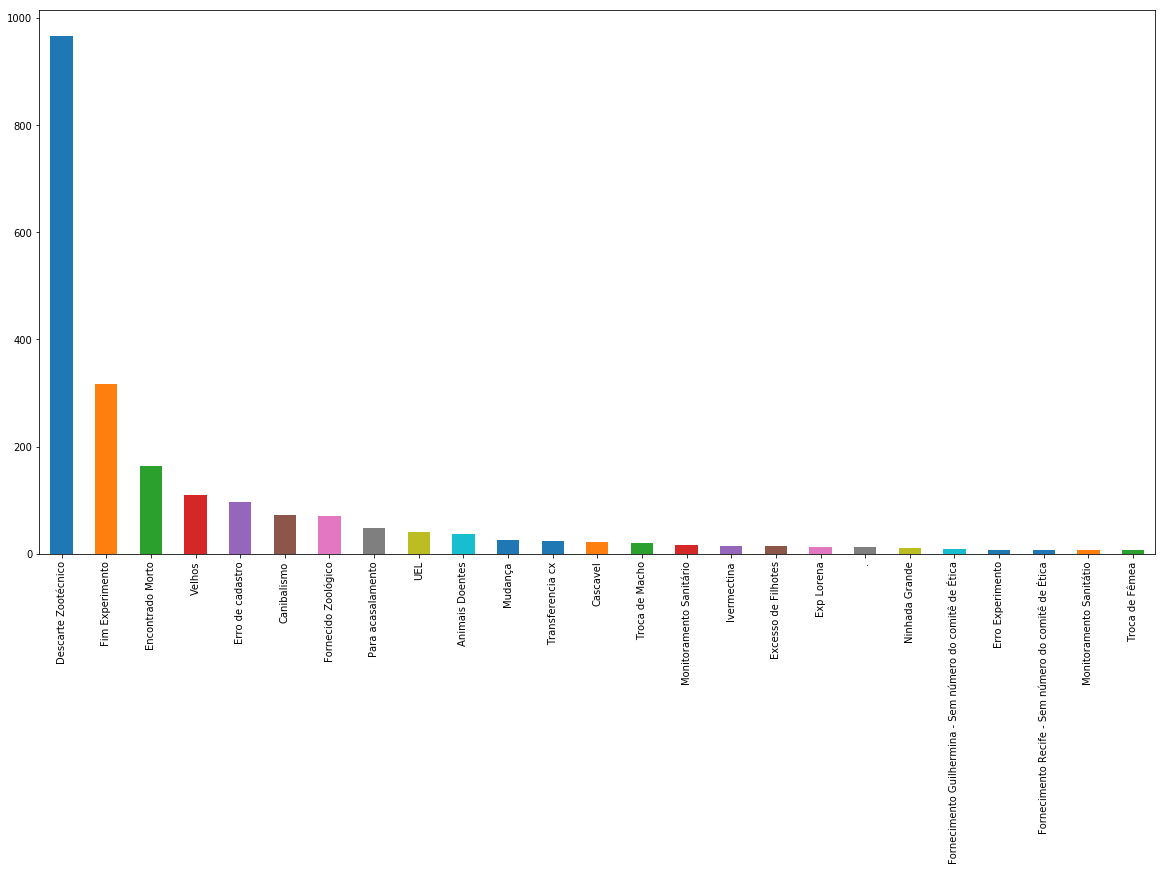

In [234]:
#motivo de descarte
plt.figure(figsize=(20,10))
descarte[(descarte['obs_desc'] != 'AAA')
     & (descarte['obs_desc'] != '666')
    & (descarte['num_ani'] < 200)
    ]['obs_desc'].value_counts()[:25].plot(
    kind='bar'
)

#desc[desc['obs_desc'] == 'Descarte Zootécnico']['num_ani'].sum()

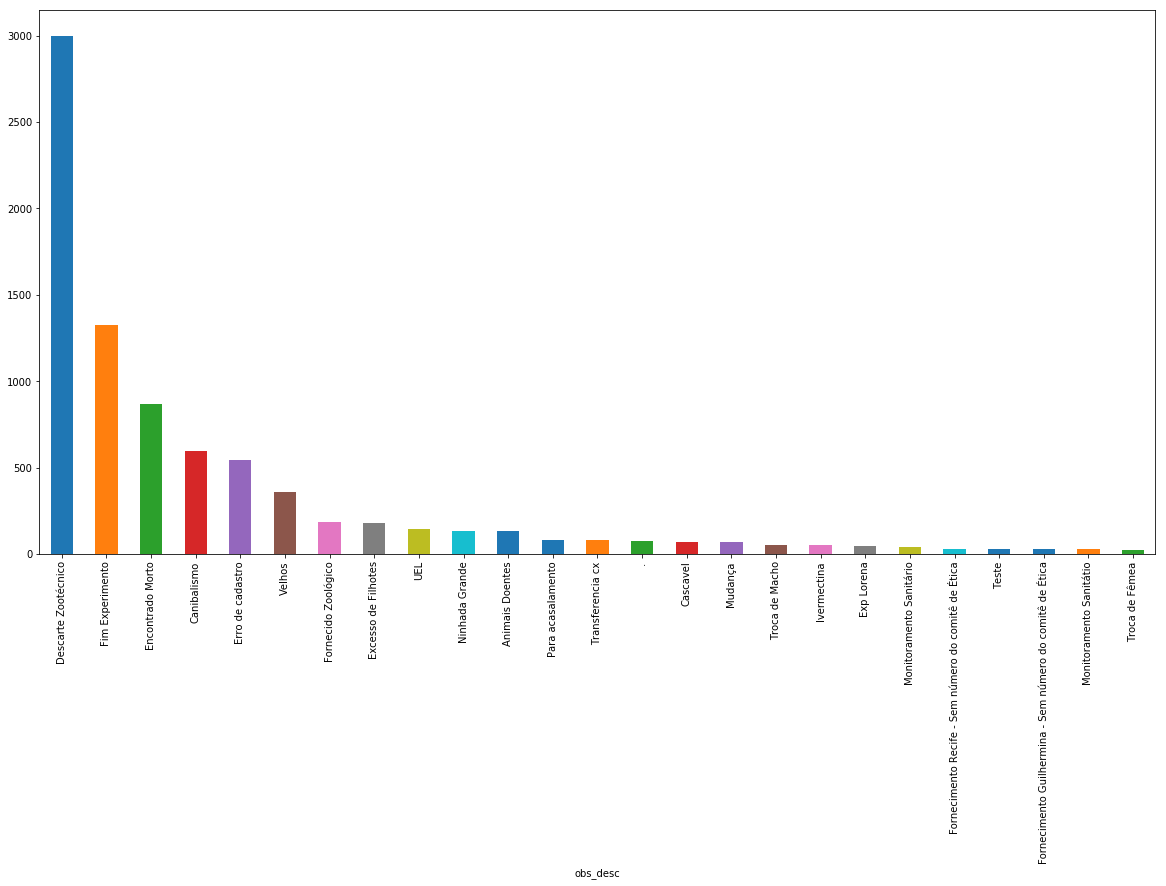

In [235]:
plt.figure(figsize=(20,10))
num_animais = descarte.groupby('obs_desc')
num_animais['num_ani'].sum().sort_values(ascending=False)[:25].plot(
    kind='bar'
)

In [240]:
# descarte = descarte[(descarte['obs_desc'] != 'AAA')
descarte['num_sex_m'] != '666'

TypeError: invalid type comparison

In [237]:
desc_sexag = pd.DataFrame(descarte['obs_des'])
desc_sexag['num_ani'] = descarte['num_ani']
desc_sexag[]
# desc_df = pd.DataFrame(descarte['obs_desc'])
# desc_df['num_ani'] = descarte['num_ani']
# #desc_df = descarte.set_index('obs_desc')
# desc_df.head()

SyntaxError: invalid syntax (<ipython-input-237-add078c7cab6>, line 3)